<a href="https://colab.research.google.com/github/PedemonteGiacomo/MachineLearning/blob/main/ModelingDataAndClassifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as nml

In [2]:
import warnings #removing deprecated errors
warnings.simplefilter(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category

TWO BALL TOY

In [3]:
n = 100 #number of samples
d = 2 #number of dimensions
c = 3
#create the dataset
#positive labeled sample
Xp = nml.randn(int(n/2),d) + c #gaussian is centered in the first quadrant plus c
#negative labeled sample
Xn = nml.randn(int(n/2),d) - c #i plase another gaussian in the third quadrant
#to obtain the matrix concatenated at the axis 0
X = np.concatenate((Xp,Xn),axis=0)
#need to do the vector of the targets
#Y of the positive. In one dimension
Yp = np.ones((int(n/2),1))
#this for the negative
Yn = -np.ones((int(n/2),1))
#concatenate it
Y = np.concatenate((Yp,Yn),axis=0)

NORMALIZATION

In order to do normalization we need to import more library

In [4]:
from sklearn import preprocessing #contains all the normalization stuff and more ....

In [5]:
scalerX = preprocessing.MinMaxScaler() #puts the data between 0 and 1
X = scalerX.fit_transform(X)

TRAIN

First of all we need to create the model:
we go to the skit learn lybrary/regression/ and goes to find ridge regression, lasso and so more...

In [6]:
from sklearn.linear_model import Ridge

In [7]:
#we fit with this model
#M = KernelRidge(alpha = .0001, kernel = 'rbf', gamma = 1000)
M = Ridge(alpha = 1)
M.fit(X,Y)

Ridge(alpha=1)

PLOT

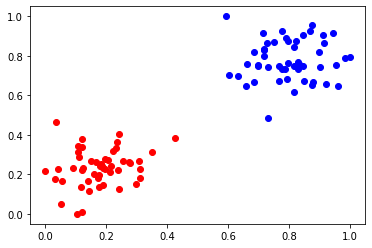

In [8]:
fig, ax = plt.subplots()
# I plot my dataset
ax.plot(X[(Y>0).flatten(),0],X[(Y>0).flatten(),1],'bo') #first and second dimensions for the positive target
ax.plot(X[(Y<0).flatten(),0],X[(Y<0).flatten(),1],'ro') #first and second dimensions for the negative target

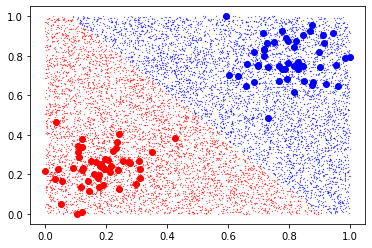

In [9]:
fig, ax = plt.subplots()
# I plot my dataset as before
ax.plot(X[(Y>0).flatten(),0],X[(Y>0).flatten(),1],'bo') #first and second dimensions for the positive target
ax.plot(X[(Y<0).flatten(),0],X[(Y<0).flatten(),1],'ro') #first and second dimensions for the negative target

#number of points to plot the separator
ns = 10000
#i choose the separator
XS = nml.rand(ns,d)
#compute the label by applying our model on this data
YS = M.predict(XS)
#exactly the same as before on those data that I have optain
#markersize is to have small dots (with the use of b. too)
ax.plot(XS[(YS>0).flatten(),0],XS[(YS>0).flatten(),1],'b.',markersize=.5)
ax.plot(XS[(YS<0).flatten(),0],XS[(YS<0).flatten(),1],'r.',markersize=.5)

WITH KERNELS

Now we can try to change the model: we can do this for example with  the kernels? (always search in sckit-learn.org) Of course, with all the details viewed at lessons.

In [10]:
from sklearn.kernel_ridge import KernelRidge

In [11]:
#i need to change only the model
# i need to set up the alpha, the kernel and gamma.
M = KernelRidge(alpha = .0001, kernel = 'rbf', gamma = 1000)
#changing gamma: 
#with small gamma we obtain something linear
#with higer gamma starts to obtain something strange in the separator
#changing alpha to obtain something more wrong (lower alpha more --> complex)
M.fit(X,Y)

KernelRidge(alpha=0.0001, gamma=1000, kernel='rbf')

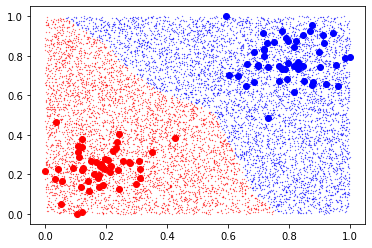

In [12]:
#all the rest of code remain equal
fig, ax = plt.subplots()
# I plot my dataset as before
ax.plot(X[(Y>0).flatten(),0],X[(Y>0).flatten(),1],'bo') #first and second dimensions for the positive target
ax.plot(X[(Y<0).flatten(),0],X[(Y<0).flatten(),1],'ro') #first and second dimensions for the negative target

#number of points to plot the separator
ns = 10000
#i choose the separator
XS = nml.rand(ns,d)
#compute the label by applying our model on this data
YS = M.predict(XS)
#exactly the same as before on those data that I have optain
#markersize is to have small dots (with the use of b. too)
ax.plot(XS[(YS>0).flatten(),0],XS[(YS>0).flatten(),1],'b.',markersize=.5)
ax.plot(XS[(YS<0).flatten(),0],XS[(YS<0).flatten(),1],'r.',markersize=.5)

DIFFERENT TYPE OF CLASSIFICATION

If we want to see this better we can put more data in the beginning in different forms we obtain different separators.

In [13]:
n = 100 #number of samples
d = 2 #number of dimensions
c = 3
#create the dataset
#positive labeled sample
Xp = nml.randn(int(n/2),d) + c #gaussian is centered in the first quadrant plus c
#negative labeled sample
Xn = nml.randn(int(n/2),d) - c #i plase another gaussian in the third quadrant
#to obtain the matrix concatenated at the axis 0
X = np.concatenate((Xp,Xn),axis=0)
# this to obtain something which is like red blue red
Xn = nml.randn(int(n/2),d) + 2*c
#reconcatenate
X = np.concatenate((X,Xn),axis=0)


#need to do the vector of the targets
#Y of the positive. In one dimension
Yp = np.ones((int(n/2),1))
#this for the negative
Yn = -np.ones((int(n/2),1))
#concatenate it
Y = np.concatenate((Yp,Yn),axis=0)
#do the same thing as above for the targets
Yn = -np.ones((int(n/2),1))
Y = np.concatenate((Y,Yn),axis=0)

In [14]:
#NORMALIZATION as before
scalerX = preprocessing.MinMaxScaler()
X = scalerX.fit_transform(X)

In [15]:
#TRAIN
M = KernelRidge(alpha = .0001, kernel = 'rbf', gamma = 1000)
#with gamma like 10 produce something more wrong
#1000 is more better classifier
M.fit(X,Y)

KernelRidge(alpha=0.0001, gamma=1000, kernel='rbf')

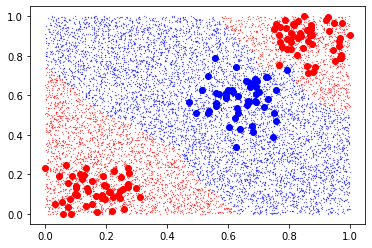

In [16]:
#PLOT

#all the rest of code remain equal
fig, ax = plt.subplots()
# I plot my dataset as before
ax.plot(X[(Y>0).flatten(),0],X[(Y>0).flatten(),1],'bo') #first and second dimensions for the positive target
ax.plot(X[(Y<0).flatten(),0],X[(Y<0).flatten(),1],'ro') #first and second dimensions for the negative target

#number of points to plot the separator
ns = 10000
#i choose the separator
XS = nml.rand(ns,d)
#compute the label by applying our model on this data
YS = M.predict(XS)
#exactly the same as before on those data that I have optain
#markersize is to have small dots (with the use of b. too)
ax.plot(XS[(YS>0).flatten(),0],XS[(YS>0).flatten(),1],'b.',markersize=.5)
ax.plot(XS[(YS<0).flatten(),0],XS[(YS<0).flatten(),1],'r.',markersize=.5)

CROSS-VALIDATION

for do this we need to split the data in:
  - train
  - validation

first of all i have to know the size of n

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
np.size(X,0)#first dimension

150

In [19]:
np.size(X,1)#second dimension

2

How can i split this? Using the function split

In [20]:
from random import sample
sample(range(5),3)

[1, 3, 4]

Sample without replacement. I have extracted 3 balls from a bag of balls. Randomly of course

In [21]:
i = sample(range(n),n) #now i have the permutation of all the indexes
#the data for learning will be for learning (70% but randomly)
il = i[0:int(.7*n)]
#the other one will be the remaing part for validation (30% but randomly)
iv = i[int(.7*n):n]
#what obtain is this
XL = X[il,:]
YL = X[il]
XV = X[iv,:]
YV = X[iv]

Let's use the parameters with a grid dictionary: we need to optimize alpha, kernel and gamma(usual notation). With the kernel that is fixed.

In [ ]:
from sklearn.utils import estimator_html_repr
#create this dictionary, do the cartasian product of all this possibilities because is grid
grid = {
    'alpha': np.logspace(-4,3,10),
    'kernel': ['rbf'],
    'gamma': np.logspace(-4,3,10) #usual notation (power of 4, power of 2, 10 points)
    #then 10 by 10 is 100 possibilities
}

#we need to construct
HS = GridSearchCV{
    estimator     #algorithm
    grid 
    scoring
    cv
}
HS = fit(X,Y) #train the estimator on that data with the optimal configuration